<h3>Лабораторна робота: Генерація та обробка масиву</h3>

<br>Варіант 14</br>
1. Створити програму для генерації довільного масиву із 42 цілих чисел, які не перевищують по
модулю 99, з наступними властивостями:
1.1. При кожному запуску програми масив повинен бути різним.
1.2. Масив повинен містити 20 відсотків значень від 1 до 9.
1.3. Масив повинен містити 20 відсотків нульових елементів (розташованих в довільних місцях)
2. Зберегти згенерований масив в файл.
3. Створити програму, яка зчитує із файлу згенерований масив попередньою програмою і виводить
його на екран.
4. Візуалізувати масив за допомогою стовпчастої вертикальної діаграми. Виділити кольором
максимальний елемент, а також вказати значення на діаграмі. Виділити іншим кольором
елементи від 1 до 9.
5. Порахувати кількість нульових елементів.
6. Порахувати кількість елементів масиву від 1 до 9, розташованих після максимального.
7. Перетворити масив таким чином, щоб спочатку йшли всі елементи від 1 до 9, потім всі нульові,
потім інші елементи, відсортовані за збиванням. Вивести отриманий масив та його графічну
діаграму на екран.

1. Генерація довільного масиву

У цьому розділі програма генерує масив з 42 цілих чисел, які не перевищують по модулю 99. Масив міститиме 20% значень від 1 до 9 та 20% нульових елементів.

In [5]:
import numpy as np
import random

# Функція для генерації масиву
def generate_array():
    total_numbers = 42
    num_zeros = int(total_numbers * 0.2)  # Кількість нульових елементів
    num_small_values = int(total_numbers * 0.2)  # Кількість значень від 1 до 9
    other_numbers = total_numbers - (num_zeros + num_small_values)  # Інші значення

    # Генерація нульових елементів
    zeros = [0] * num_zeros
    # Генерація малих значень (1-9)
    small_values = [random.randint(1, 9) for _ in range(num_small_values)]
    # Генерація інших чисел (-99 до 99, виключаючи малі значення та нулі)
    other_values = [random.randint(-99, 99) for _ in range(other_numbers)]

    # Об'єднання та перемішування
    combined = zeros + small_values + other_values
    random.shuffle(combined)

    return combined

# Генерація масиву та збереження в файл
array = generate_array()
with open('array.txt', 'w') as f:
    f.write(','.join(map(str, array)))

2. Зчитування масиву з файлу

Тут ми зчитуємо згенерований масив з файлу та виводимо його на екран.

In [6]:
# Функція для зчитування масиву з файлу
def read_array_from_file(filename):
    with open(filename, 'r') as f:
        content = f.read()
    return list(map(int, content.split(',')))

# Зчитування масиву з файлу
array_from_file = read_array_from_file('array.txt')
print("Згенерований масив:", array_from_file)

Згенерований масив: [26, 6, 97, 4, 35, 4, 32, -4, -99, 73, 95, 0, 91, -74, 83, -32, 0, 87, 0, 2, -61, -14, 86, 7, 88, 0, -28, 3, 27, 0, -57, 0, 37, 0, 82, 73, 10, 0, -64, 35, 6, 5]


3. Візуалізація масиву

У цьому розділі ми візуалізуємо масив за допомогою стовпчастої діаграми, виділяючи максимальний елемент та елементи від 1 до 9.

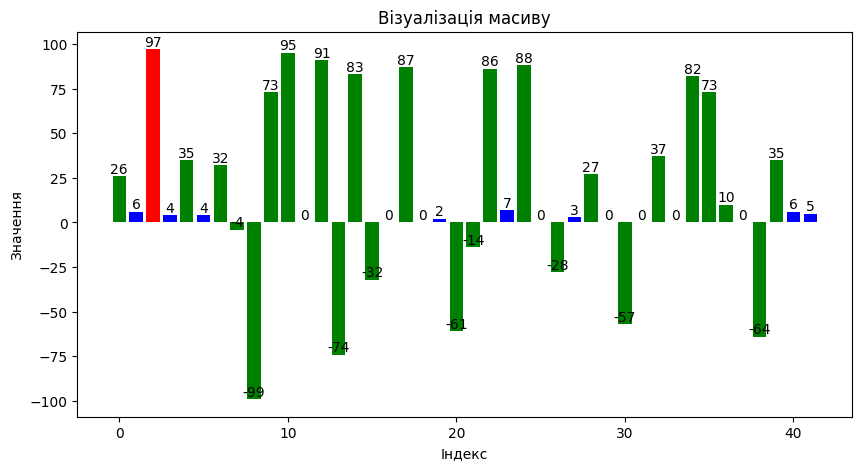

In [7]:
import matplotlib.pyplot as plt

# Функція для візуалізації масиву
def visualize_array(array):
    plt.figure(figsize=(10, 5))
    colors = ['red' if (x == max(array)) else 'blue' if (1 <= x <= 9) else 'green' for x in array]

    # Створення стовпчастої діаграми
    bars = plt.bar(range(len(array)), array, color=colors)
    
    # Додавання значень над стовпцями
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.title('Візуалізація масиву')
    plt.xlabel('Індекс')
    plt.ylabel('Значення')
    plt.show()

# Візуалізація масиву
visualize_array(array_from_file)

4. Підрахунок нульових елементів

Ми підрахуємо кількість нульових елементів у масиві та виведемо результат.

In [8]:
# Підрахунок нульових елементів
count_zeros = array_from_file.count(0)
print("Кількість нульових елементів:", count_zeros)

Кількість нульових елементів: 8


5. Підрахунок елементів від 1 до 9 після максимального елемента

У цьому розділі ми підрахуємо кількість елементів від 1 до 9, які розташовані після максимального елемента.

In [9]:
max_value = max(array_from_file)
max_index = array_from_file.index(max_value)
count_after_max = sum(1 for x in array_from_file[max_index+1:] if 1 <= x <= 9)
print("Кількість елементів від 1 до 9 після максимального:", count_after_max)

Кількість елементів від 1 до 9 після максимального: 7


6. Перетворення масиву та візуалізація

На завершення, ми перетворимо масив так, щоб спочатку йшли елементи від 1 до 9, потім нулі, а потім інші елементи, відсортовані за спаданням. Після цього ми візуалізуємо перетворений масив.

Перетворений масив: [6, 4, 4, 2, 7, 3, 6, 5, 0, 0, 0, 0, 0, 0, 0, 0, 97, 95, 91, 88, 87, 86, 83, 82, 73, 73, 37, 35, 35, 32, 27, 26, 10, -4, -14, -28, -32, -57, -61, -64, -74, -99]


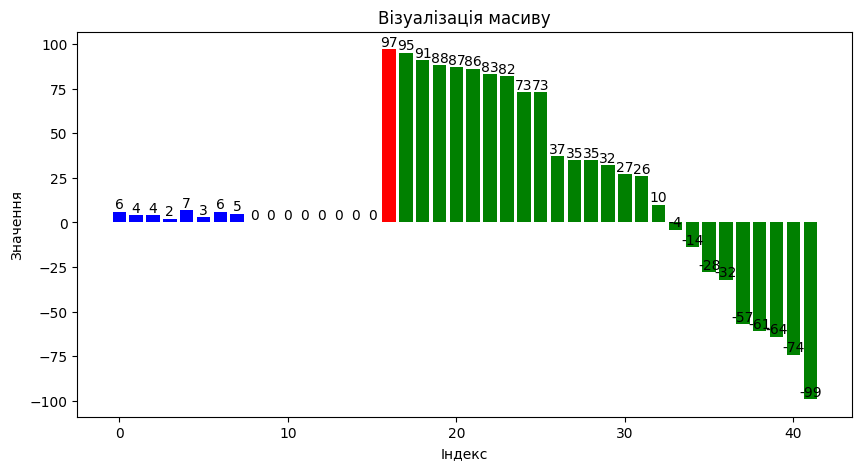

In [10]:
# Функція для перетворення масиву
def rearrange_array(array):
    ones_to_nines = [x for x in array if 1 <= x <= 9]
    zeros = [x for x in array if x == 0]
    others = sorted([x for x in array if not (1 <= x <= 9 or x == 0)], reverse=True)
    return ones_to_nines + zeros + others

# Перетворений масив
rearranged_array = rearrange_array(array_from_file)
print("Перетворений масив:", rearranged_array)

# Візуалізація перетвореного масиву
visualize_array(rearranged_array)

Посилання на Git: https://github.com/BKon-A/python-labs/tree/main/Lab6 